# ggplot 420 - scales for logarithmic x and y axis 

the x and/or the y axis can be set o a log10 scale

# 0 - setup notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 
from math import *

# 1 - get some data

In [3]:
#dia = pd.read_csv('./dat/dia.csv')

dat = pd.DataFrame([[x,10+(x/10),10+(x**2/10),10+(x**3)/10] for x in range(20)], columns=['id','x','x2','x3'])
dat.head()

,id,x,x2,x3
0,0,10.0,10.0,10.0
1,1,10.1,10.1,10.1
2,2,10.2,10.4,10.8
3,3,10.3,10.9,12.7
4,4,10.4,11.6,16.4


# 2 - the un-customized plot

Without customization the plot looks like this

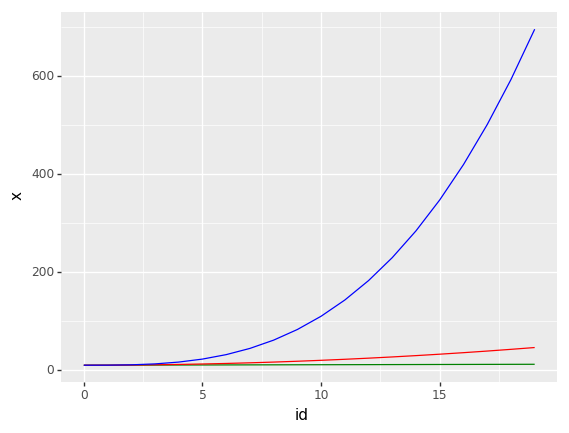

<ggplot: (-9223372036840107583)>

In [4]:
ggplot(data=dat, mapping=aes(x='id') ) + \
    geom_line(mapping=aes(x='id',y='x' ), color='green') + \
    geom_line(mapping=aes(x='id',y='x2'), color='red'  ) + \
    geom_line(mapping=aes(x='id',y='x3'), color='blue' )
    

# 2.1 - customize the y scale

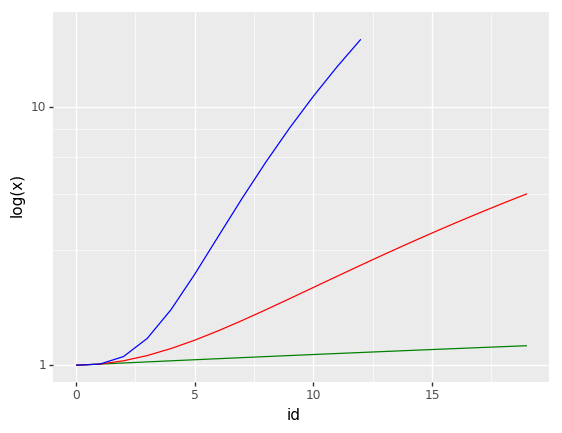

<ggplot: (-9223372036840036899)>

In [5]:
ggplot(data=dat, mapping=aes(x='id') ) + \
    geom_line(mapping=aes(x='id',y='x' ), color='green') + \
    geom_line(mapping=aes(x='id',y='x2'), color='red'  ) + \
    geom_line(mapping=aes(x='id',y='x3'), color='blue' ) + \
    scale_y_log10(breaks=[10,100], 
                  labels=['1','10'], 
                  limits=[10,200]) + \
    ylab('log(x)')

The curved lines are now straight lines and more evenly spread.

# 2.2 - customize the x scale


## get some data

income.csv has the income per capita for 180 countries.  

In [6]:
incomes = pd.read_csv('./dat/income.csv')
incomes.head()

,country,INC,LE,IR
0,Afghanistan,1637.0,55.0,4.0
1,Albania,9374.0,76.0,45.0
2,Algeria,12494.0,76.0,12.0
3,Andorra,38982.0,84.0,81.0
4,Angola,7047.0,60.0,10.0


Lets see how these incomes are distributed

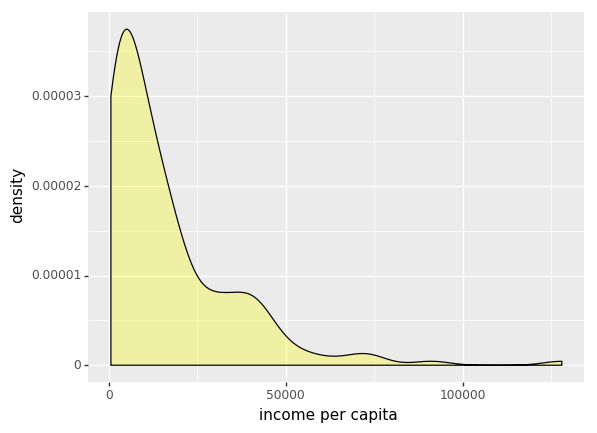

<ggplot: (-9223372036839933664)>

In [7]:
ggplot(data=incomes, mapping=aes(x='INC')) + \
    geom_density(fill='yellow', alpha=0.3) + \
    xlab('income per capita')

In [8]:
incomes['INC'].describe()

count       180.000000
mean      16596.161111
std       18760.354456
min         632.000000
25%        3327.500000
50%       10393.000000
75%       21675.500000
max      127984.000000
Name: INC, dtype: float64

The density plot shows that there are many poor countries, and only a few rich ones.  
The lowest value is 632 and the highest, the distribution is very right skewed.

## transform the x-scale by taking the log10

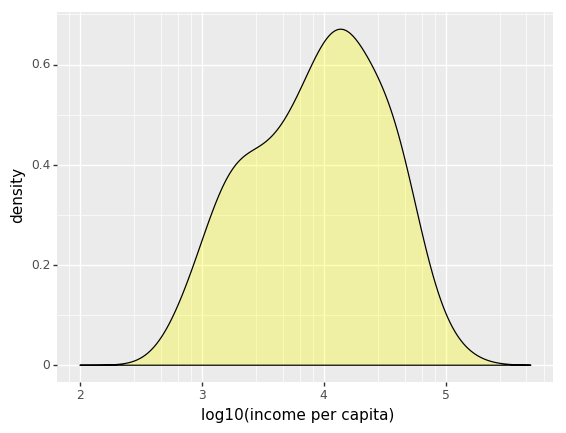

<ggplot: (-9223372036839969262)>

In [9]:
ggplot(data=incomes, mapping=aes(x='INC')) + \
    geom_density(fill='yellow', alpha=0.3) + \
    scale_x_log10(breaks=[100,1000,10000,100000], 
                  labels=['2','3','4','5'], 
                  limits=[100,500000]) + \
    xlab('log10(income per capita)')

By taking the log10 we have a distribution that better to work with  
(not all values are located in a narrow range, the distribution is more or less normal)